# Python课后作业


### 我们有城市空气质量数据，请做数据处理，绘制北京的PM2.5随时间的变化情况
####  数据来源： https://www.kaggle.com/uciml/pm25-data-for-five-chinese-cities


In [2]:
import pandas as pd
df = pd.read_csv('./data/BeijingPM20100101_20151231.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


In [3]:
df.head(10)

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,NaN,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,NaN,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0


In [4]:
#DatetimeIndex 时间戳
#PeriodIndex 时间段
#把分开的几个时间字符串转化成pandas时间类型
period = pd.PeriodIndex(year=df["year"],month=df["month"],day=df["day"],hour=df["hour"],freq="H")
df["datetime"] = period
df.set_index("datetime",inplace=True)
df

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
datetime,,,,,,,,,,,,,,,,,,
2010-01-01 00:00,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2010-01-01 01:00,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2010-01-01 02:00,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
2010-01-01 03:00,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
2010-01-01 04:00,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
2015-12-31 20:00,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
2015-12-31 21:00,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0


### 项目目标
绘制出五个城市的PM2.5随时间的变化情况
绘制PM原始值
缺失数据处理dropna
处理PM2.5的空值或者NaN 取当前小时/月的平均值
由于索引值是时间，所以只需要用dropna就可以获得可绘图的数据，如下：

In [5]:
data = df["PM_US Post"].dropna()
data

datetime
2010-01-01 23:00    129.0
2010-01-02 00:00    148.0
2010-01-02 01:00    159.0
2010-01-02 02:00    181.0
2010-01-02 03:00    138.0
                    ...  
2015-12-31 19:00    133.0
2015-12-31 20:00    169.0
2015-12-31 21:00    203.0
2015-12-31 22:00    212.0
2015-12-31 23:00    235.0
Freq: H, Name: PM_US Post, Length: 50387, dtype: float64

绘制曲线图

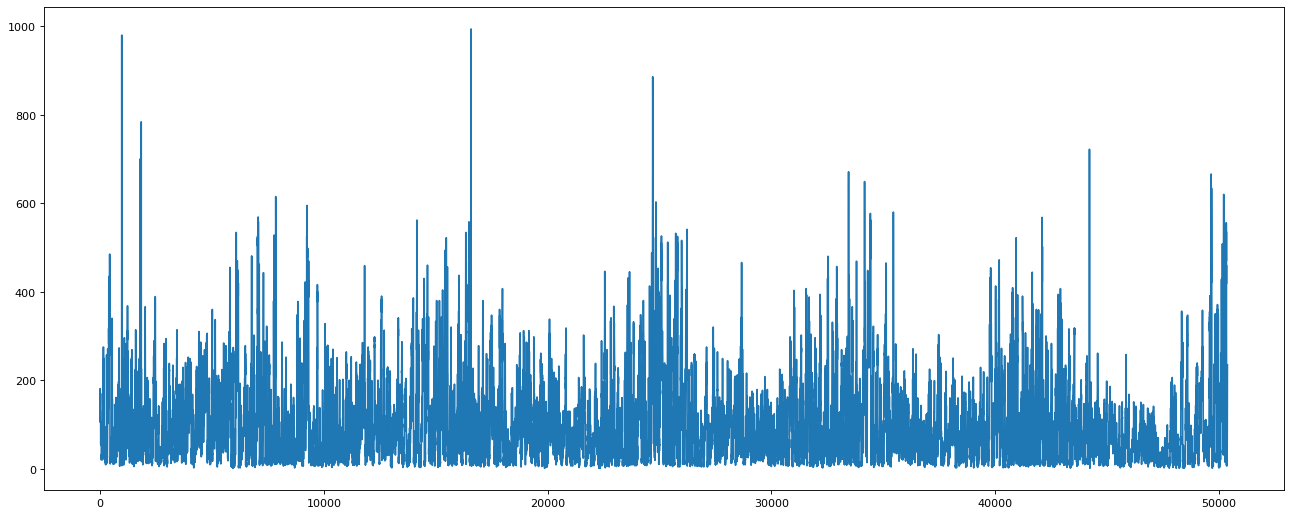

In [6]:
import matplotlib.pyplot as plt 
_x = data.index
_y = data.values
plt.figure(figsize=(20,8),dpi=80)
plt.plot(range(len(_x)),_y)
#plt.xticks(range(0,len(_x),20),list(_x)[::20])
plt.show()

降采样
按照月采样绘图

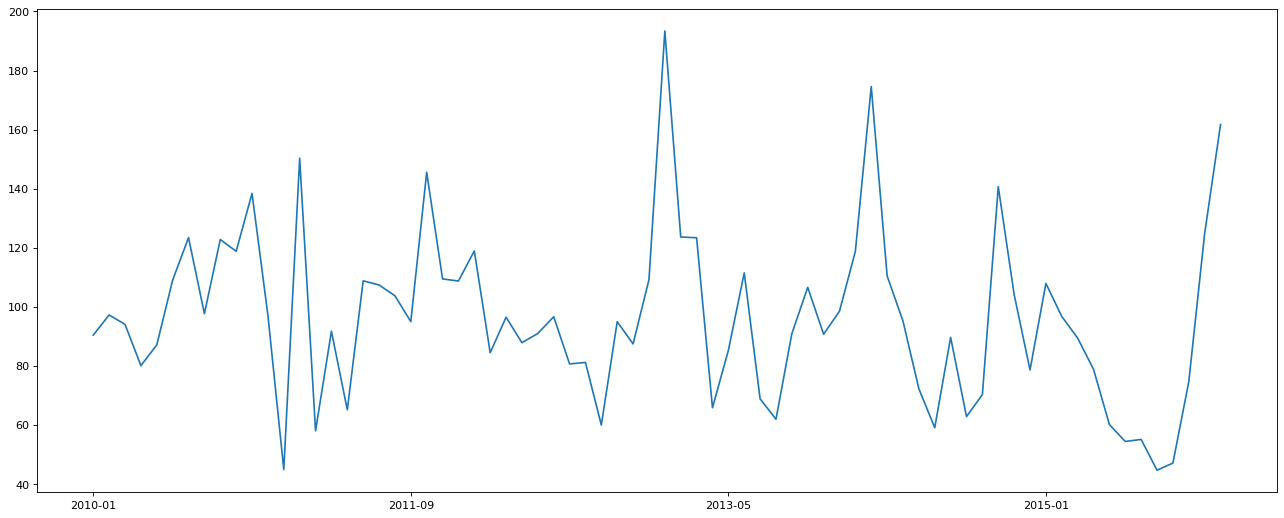

In [7]:
df2 = df.resample("M").mean()
data = df2["PM_US Post"].dropna()
_x = data.index
_y = data.values
plt.figure(figsize=(20,8),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),20),list(_x)[::20])
plt.show()

调整采样频率为7天

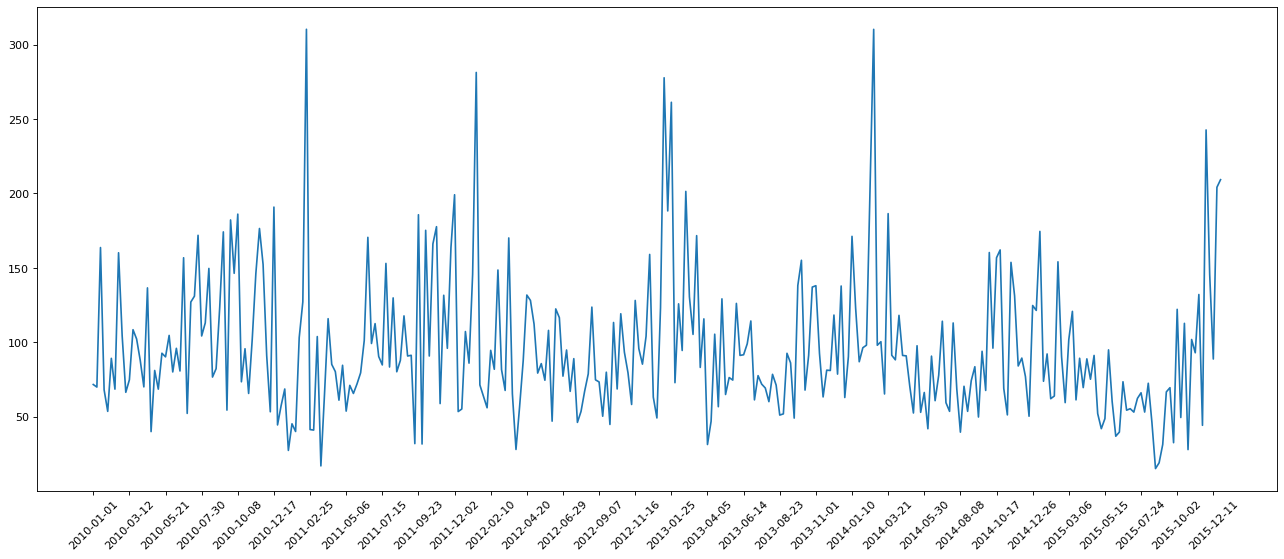

In [14]:
df3 = df.resample("7D").mean()
data = df3["PM_US Post"].dropna()
_x = data.index
_y = data.values
plt.figure(figsize=(20,8),dpi=80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation=45)
plt.show()